In [46]:
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

In [69]:
df = pd.read_csv('./out.csv', header=None, names=['i', 'j', 'd'])

In [70]:
rad = 0.0174532925

In [71]:
df['a0'] = df['i']*rad*1.8/2
df['a1'] = df['j']*rad*1.8

In [72]:
df['x'] = df.apply(lambda r: r['d']*math.sin(r['a0'])*math.cos(r['a1']), axis=1)
df['y'] = df.apply(lambda r: r['d']*math.sin(r['a0'])*math.sin(r['a1']), axis=1)
df['z'] = df.apply(lambda r: r['d']*math.cos(r['a0']), axis=1)

In [73]:
data = np.array(df[['x', 'y', 'z']])

In [74]:
df

,i,j,d,a0,a1,x,y,z
0,0,0,5,0.000000,0.000000,0.000000,0.000000,5.000000
1,0,1,1,0.000000,0.031416,0.000000,0.000000,1.000000
2,0,2,5,0.000000,0.062832,0.000000,0.000000,5.000000
3,0,3,1,0.000000,0.094248,0.000000,0.000000,1.000000
4,0,4,1,0.000000,0.125664,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
41147,102,347,199,1.602212,10.901326,-18.718316,-198.019072,-6.250741
41148,102,348,199,1.602212,10.932742,-12.489150,-198.509318,-6.250741
41149,102,349,200,1.602212,10.964158,-6.279054,-199.802673,-6.282151
41150,102,350,199,1.602212,10.995574,-0.000002,-198.901806,-6.250741


In [75]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(data)

In [76]:
o3d.visualization.draw_geometries([pcd])

<AxesSubplot:>

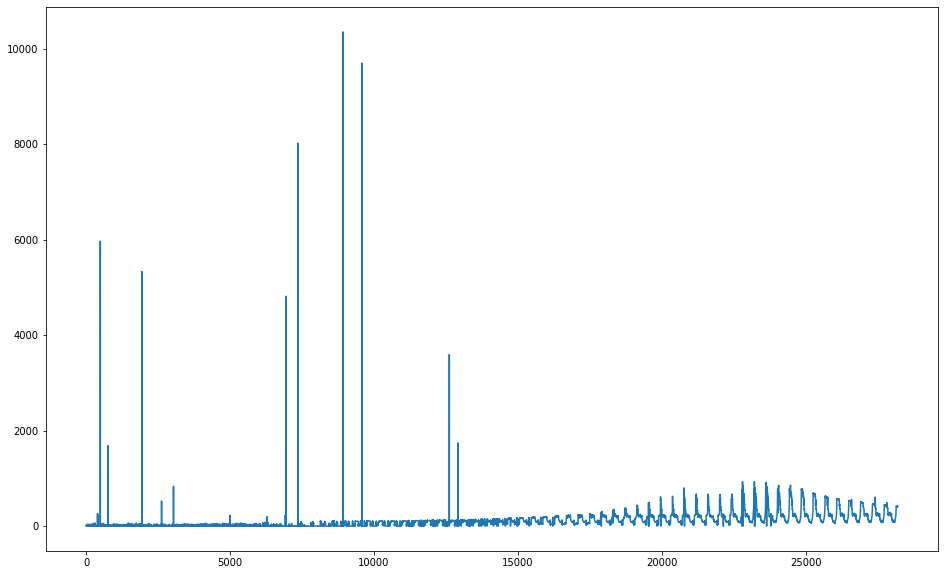

In [37]:
df['d'].plot(figsize=(16,10))